In [12]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from pylab import rcParams
import statsmodels.api as sm
import warnings
import itertools
#rom keras.models import Model
#from keras.layers import Input, Dense, LSTM, Bidirectional
#from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
prediction_data=pd.read_excel('/content/prediction_data.xlsx',engine='openpyxl')
df=pd.read_excel('/content/train_data.xlsx')
df.head()


,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자,강수량,인구,아황산가스,일산화탄소,이산화질소,철새 합계
0,2014-01-01,-0.6,4.4,9.3,2014-01-01,-5.8,-10.8,2014-01-22,9.9,12709996,0.007,0.778,0.038,0
1,2014-02-26,2.1,7.4,16.0,2014-02-26,-2.3,-9.6,2014-02-04,16.5,12709996,0.006,0.733,0.035,0
2,2014-03-28,7.6,13.6,24.7,2014-03-28,2.3,-4.2,2014-03-10,10.9,12709996,0.006,0.622,0.039,0
3,2014-04-25,13.3,19.9,26.3,2014-04-25,7.9,1.4,2014-04-05,55.7,12709996,0.005,0.500,0.033,0
4,2014-05-31,18.2,25.2,33.2,2014-05-31,12.5,6.0,2014-05-06,64.4,12709996,0.005,0.456,0.030,0


In [15]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['평균기온(℃)','평균최고기온(℃)','최고기온(℃)','평균최저기온(℃)','최저기온(℃)','강수량','인구','아황산가스','일산화탄소','이산화질소','철새 합계'] ##수정 필요
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량,인구,아황산가스,일산화탄소,이산화질소,철새 합계
0,0.093750,0.096273,0.019608,0.061728,0.157068,0.013743,0.0,1.0,1.000000,0.923077,0.000000
1,0.178125,0.189441,0.238562,0.169753,0.188482,0.023392,0.0,0.8,0.898876,0.807692,0.000000
2,0.350000,0.381988,0.522876,0.311728,0.329843,0.015205,0.0,0.8,0.649438,0.961538,0.000000
3,0.528125,0.577640,0.575163,0.484568,0.476440,0.080702,0.0,0.6,0.375281,0.730769,0.000000
4,0.681250,0.742236,0.800654,0.626543,0.596859,0.093421,0.0,0.6,0.276404,0.615385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
67,0.950000,0.937888,0.908497,0.953704,0.895288,0.171637,1.0,0.2,0.150562,0.038462,0.000000
68,0.809375,0.791925,0.709150,0.805556,0.746073,0.294444,1.0,0.2,0.150562,0.153846,0.000000
69,0.612500,0.621118,0.624183,0.577160,0.518325,0.106140,1.0,0.2,0.150562,0.307692,0.541270
70,0.346875,0.375776,0.392157,0.308642,0.337696,0.135526,1.0,0.4,0.600000,0.615385,0.473029


In [16]:
TEST_SIZE = 60

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [17]:
from sklearn.model_selection import train_test_split

feature_cols = ['평균기온(℃)','평균최고기온(℃)','최고기온(℃)','평균최저기온(℃)','최저기온(℃)','강수량','인구','아황산가스','일산화탄소','이산화질소','철새 합계'] 
label_cols = ['철새 합계']

train_feature = train.iloc[:, :-1]
train_label = train.iloc[:, -1]

test_feature = test.iloc[:, :-1]
test_label = test.iloc[:, -1]


x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

((9, 10), (3, 10))

In [18]:
prediction_data

prediction_data.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['평균기온(℃)','평균최고기온(℃)','최고기온(℃)','평균최저기온(℃)','최저기온(℃)','강수량','인구','아황산가스','일산화탄소','이산화질소','철새 합계'] ##수정 필요
pdf_scaled = scaler.fit_transform(prediction_data[scale_cols])
pdf_scaled = pd.DataFrame(pdf_scaled)
pdf_scaled.columns = scale_cols

pdf_scaled

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량,인구,아황산가스,일산화탄소,이산화질소,철새 합계
0,0.073801,0.081081,0.034043,0.072917,0.163265,0.086146,0.0,1.0,1.000000,1.000000,0.819500
1,0.103321,0.115830,0.165957,0.093750,0.020408,0.083397,0.0,0.0,0.666667,0.842105,0.493294
2,0.276753,0.347490,0.404255,0.204861,0.256560,0.022759,0.0,0.0,0.666667,0.631579,0.403503
3,0.402214,0.474903,0.527660,0.336806,0.399417,0.017107,0.0,0.0,0.333333,0.315789,0.000000
4,0.664207,0.733591,0.778723,0.614583,0.618076,0.142508,0.0,0.0,0.333333,0.263158,0.000000
5,0.863469,0.934363,0.961702,0.809028,0.746356,0.132122,0.0,0.0,0.333333,0.210526,0.000000
6,0.892989,0.911197,0.919149,0.875000,0.877551,0.580571,0.0,0.0,0.333333,0.052632,0.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000
8,0.793358,0.826255,0.778723,0.763889,0.734694,0.242554,0.0,0.0,0.333333,0.105263,0.000000
9,0.523985,0.594595,0.548936,0.447917,0.431487,0.026883,0.0,0.0,0.666667,0.578947,0.565171


In [19]:
pdf_scaled.columns

Index(['평균기온(℃)', '평균최고기온(℃)', '최고기온(℃)', '평균최저기온(℃)', '최저기온(℃)', '강수량', '인구',
       '아황산가스', '일산화탄소', '이산화질소', '철새 합계'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

prediction_feature=pdf_scaled[['평균기온(℃)', '평균최고기온(℃)', '최고기온(℃)', '평균최저기온(℃)', '최저기온(℃)', '강수량', '인구','아황산가스', '일산화탄소', '이산화질소']]
prediction_feature

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량,인구,아황산가스,일산화탄소,이산화질소
0,0.073801,0.081081,0.034043,0.072917,0.163265,0.086146,0.0,1.0,1.000000,1.000000
1,0.103321,0.115830,0.165957,0.093750,0.020408,0.083397,0.0,0.0,0.666667,0.842105
2,0.276753,0.347490,0.404255,0.204861,0.256560,0.022759,0.0,0.0,0.666667,0.631579
3,0.402214,0.474903,0.527660,0.336806,0.399417,0.017107,0.0,0.0,0.333333,0.315789
4,0.664207,0.733591,0.778723,0.614583,0.618076,0.142508,0.0,0.0,0.333333,0.263158
5,0.863469,0.934363,0.961702,0.809028,0.746356,0.132122,0.0,0.0,0.333333,0.210526
6,0.892989,0.911197,0.919149,0.875000,0.877551,0.580571,0.0,0.0,0.333333,0.052632
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000
8,0.793358,0.826255,0.778723,0.763889,0.734694,0.242554,0.0,0.0,0.333333,0.105263
9,0.523985,0.594595,0.548936,0.447917,0.431487,0.026883,0.0,0.0,0.666667,0.578947


In [21]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from pandas import Series

In [23]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(x_train, y_train)
rdr_prediction=model_rfr.predict(prediction_feature)
predict_evaluation = pd.DataFrame(rdr_prediction, columns = ['prediction'])
predict_evaluation

,prediction
0,0.268094
1,0.324538
2,0.187164
3,0.130761
4,0.098493
5,0.027332
6,0.024201
7,0.024201
8,0.027332
9,0.140153


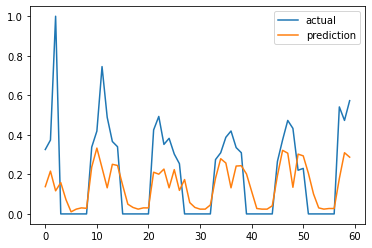

In [24]:
rfr_pred_y = model_rfr.predict(test_feature)

plt.plot(Series(test_label.array), label = 'actual')
plt.plot(Series(rfr_pred_y), label = 'prediction')
plt.legend()
plt.show()

# **model validation evaluation**

In [25]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

In [26]:
# train rmse
train_predict = model_rfr.predict(x_train)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )
 
# validation rmse
valid_predict = model_rfr.predict(x_valid)
print("RMSE':{}".format(math.sqrt(mean_squared_error(valid_predict, y_valid))) )
 


RMSE':0.074541606782861
RMSE':0.1173179818669542
